In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

import re
#import time


In [2]:
import pickle
with open("HP_df.pkl","rb") as f:
    hello_lap = pickle.load(f)

In [3]:
df=hello_lap.copy() 
df.head()

,ProductName,Processor,RAM,HardDrive,OS,ScreenSize,Additional_Features,Processor_Type,OriginalPrice,GST,OfferPercentage,PriceSaved,Price,ProductID
0,HPPavilionPlus35.6cmLaptop14-ew0154TU-Blue,13th Generation Intel® Core™ i7 processor,16,1024,Windows 11 Pro,35.6 cm,"Backlit keyboard, Wide Vision 5MP IR camera, B...",Intel,132408,17542,13,17409,114999,92U78PA
1,HPPavilionPlus35.6cmLaptop14-ey0789AU-Silver,AMD Ryzen™ 7 processor,16,1024,Windows 11 Home,35.6 cm,"Backlit keyboard, Wide Vision 5MP IR camera, B...",AMD,105926,14034,13,13927,91999,92U77PA
2,HPPavilion35.6cmLaptop14-ec1003AU,AMD Ryzen™ 5-5625U Processor,8,512,Windows 11 Home,35.6 cm,"Backlit keyboard, Wide Vision 720p HD camera, ...",AMD,61022,8085,13,8023,52999,689H4PA
3,HPPavilion35.6cmx3602-in-1Laptop14-ek1009TU-Gold,13th Generation Intel® Core™ i5 processor,16,1024,Windows 11 Home,35.6 cm,"Backlit keyboard, Fingerprint reader, True Vis...",Intel,92746,12813,9,8747,83999,7N759PA
4,HPEnvy33.8cmx3602-in-1LaptopOLED13-bf0141TU-Si...,12th Gen Intel® Evo™ Powered by Core™ i7 proce...,16,512,Windows 11 Home,33.8 cm,"Backlit Keyboard, True Vision 5MP IR camera, B...",Intel,121629,16780,9,11630,109999,81B47PA


## Uni-Variate Analysis

In [4]:
crosstab = pd.crosstab(df['ScreenSize'], df['OS'])
crosstab

OS,Windows 11 Home,Windows 11 Home Single Language,Windows 11 Pro
ScreenSize,,,
33.78 cm,15,0,0
33.8 cm,45,0,0
34.3 cm,15,0,0
35.6 cm,180,15,15
39.6 cm,75,0,0


<Axes: xlabel='ScreenSize'>

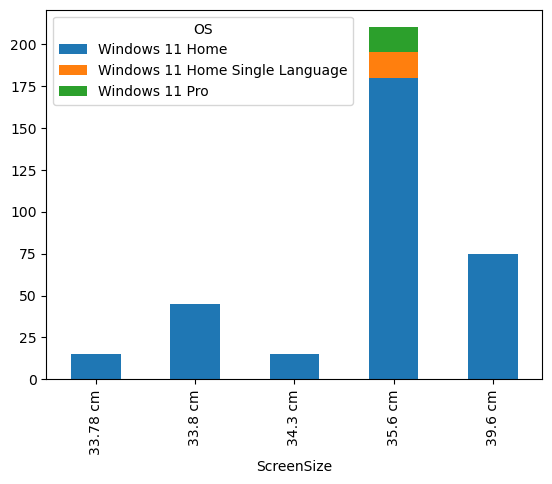

In [5]:
crosstab.plot(kind='bar', stacked=True)

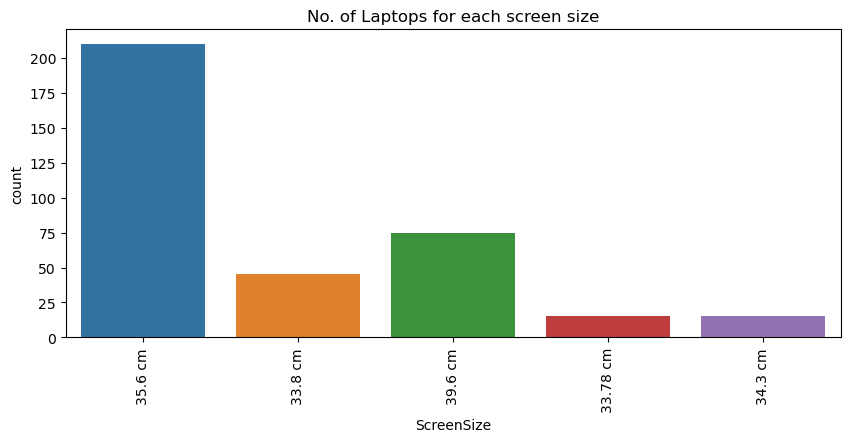

In [5]:
plt.figure(figsize=(10,4))
sns.countplot(x='ScreenSize',data=df)
plt.title('No. of Laptops for each screen size')
plt.xticks(rotation=90)
plt.show()

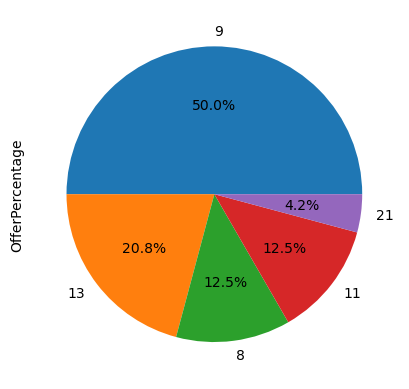

In [4]:
df["OfferPercentage"].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

In [14]:
df["OfferPercentage"].value_counts(dropna=False)

9     180
13     75
8      45
11     45
21     15
Name: OfferPercentage, dtype: int64

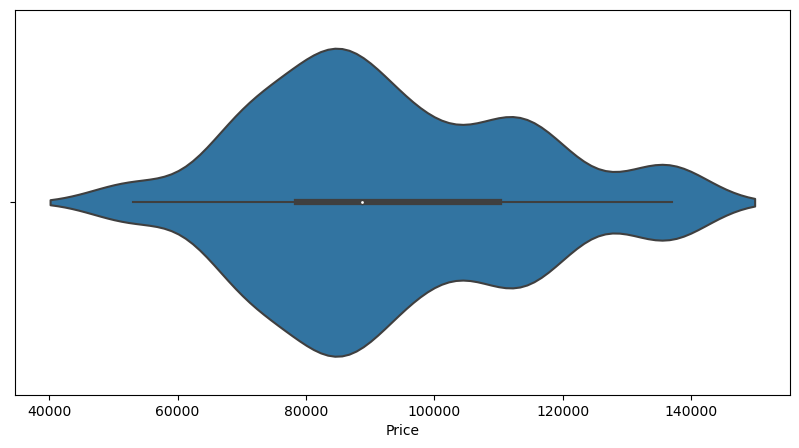

In [11]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Price', data=df)
plt.show()

## Bi-Variate Analysis

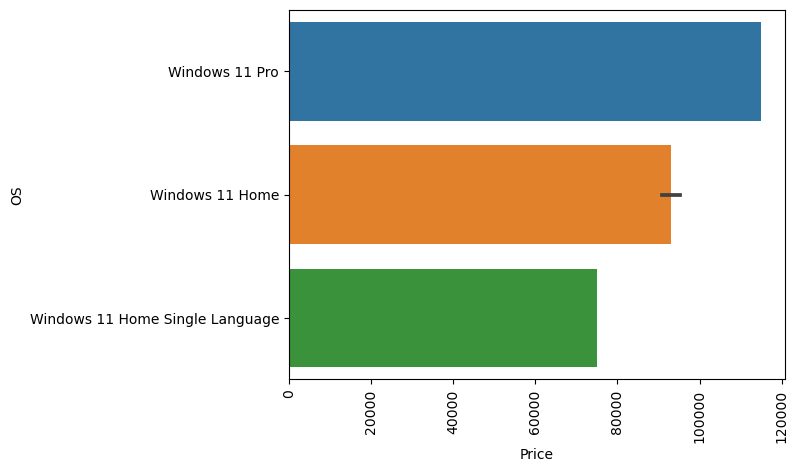

In [7]:
sns.barplot(x='Price', y='OS', data=df)
plt.xticks(rotation = 90)
plt.show()

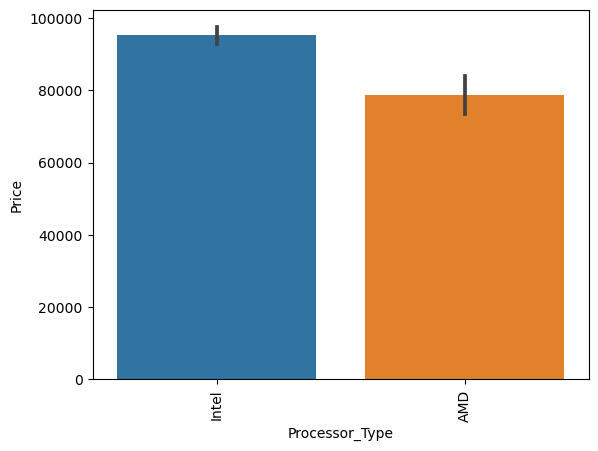

In [8]:
sns.barplot(x='Processor_Type', y='Price', data=df)
plt.xticks(rotation = 90)
plt.show()

## Multi-Variate Analysis

In [13]:
corr_max = df.corr(numeric_only=True)
corr_max

,RAM,HardDrive,OriginalPrice,GST,OfferPercentage,PriceSaved,Price
RAM,1.000000,0.213201,0.435646,0.422091,-0.058359,0.321300,0.422122
HardDrive,0.213201,1.000000,0.200539,0.177916,0.105281,0.258489,0.177947
OriginalPrice,0.435646,0.200539,1.000000,0.992669,-0.248307,0.577300,0.992671
GST,0.422091,0.177916,0.992669,1.000000,-0.362158,0.474377,1.000000
OfferPercentage,-0.058359,0.105281,-0.248307,-0.362158,1.000000,0.638100,-0.362142
PriceSaved,0.321300,0.258489,0.577300,0.474377,0.638100,1.000000,0.474393
Price,0.422122,0.177947,0.992671,1.000000,-0.362142,0.474393,1.000000


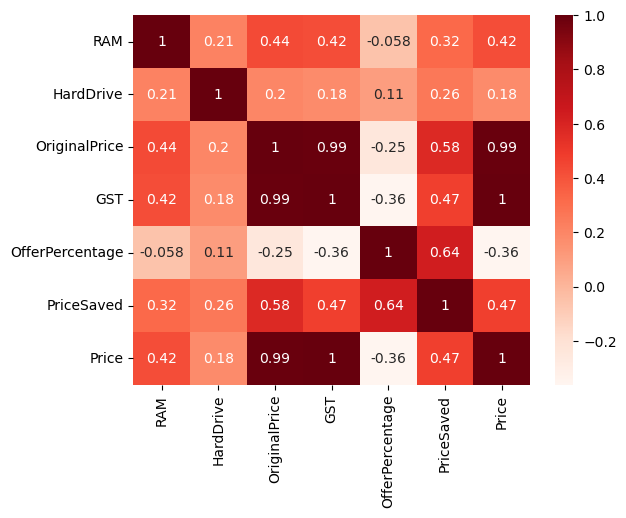

In [14]:
sns.heatmap(corr_max, cmap='Reds', annot=True)
plt.show()

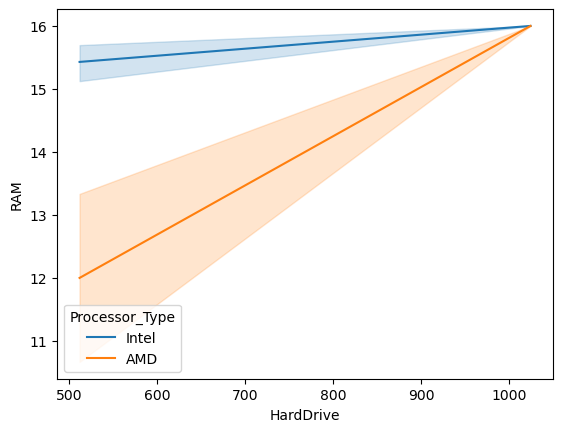

In [10]:
sns.lineplot(x = "HardDrive", y = "RAM", hue='Processor_Type',data = df)
plt.show()

<Axes: xlabel='Price', ylabel='ScreenSize'>

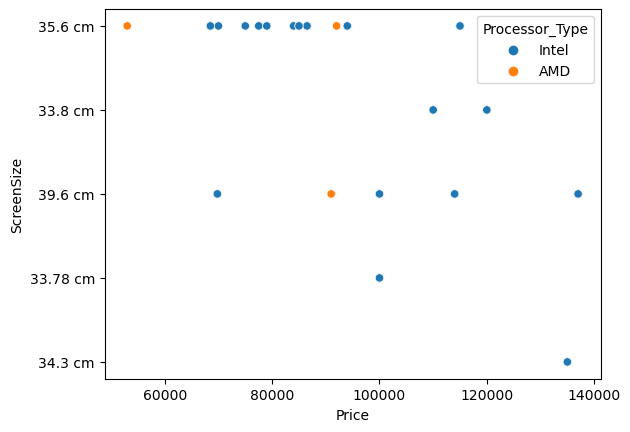

In [12]:
sns.scatterplot(x=df["Price"],y=df["ScreenSize"],hue=df["Processor_Type"])